# Loan Status Prediction

<img src="loan_status.jpeg" width="700" height="80">

# Importing Data

In [385]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [386]:
#Reading data
df = pd.read_csv("data.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [387]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [388]:
print(df.shape)
df.info()

(614, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Observation - 
1. There are missing values in the data
2. Tha dataset has 614 records of customers and 12 features/independent variables describing each record. Loan_Status is the dependent variable.

In [389]:
#Let's exlpore the output variable
df.Loan_Status.value_counts(normalize = True)*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

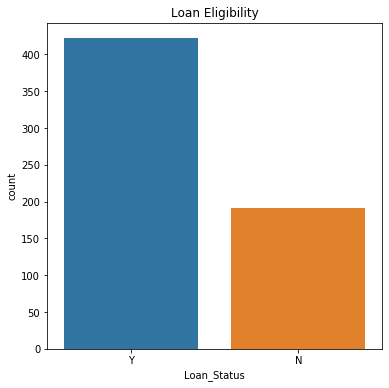

In [390]:
plt.figure(figsize=(6,6))
sns.countplot('Loan_Status', data = df)
plt.title("Loan Eligibility")
plt.show()

Almost 69% of the customers are eligible for the loan as seen above.

In [391]:
#Let's replace the yes and no in the output variable with Yes = 1 and No = 0
df.Loan_Status.replace({'Y':1,'N':0},inplace = True)

In [392]:
df.Loan_Status.unique()

array([1, 0], dtype=int64)

## Dealing with Missing Values

In [393]:
#Let's have a look at the missing values
df.isnull().sum().sort_values(ascending = False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
dtype: int64

In [394]:
df.Credit_History.value_counts(normalize = True)*100

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

In [395]:
df.Credit_History.value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [396]:
Credithistory_vs_LoanStatus = df.groupby('Credit_History').Loan_Status.mean().sort_values(ascending = False)*100
Credithistory_vs_LoanStatus.round(2)

Credit_History
1.0    79.58
0.0     7.87
Name: Loan_Status, dtype: float64

Therefore, we can clearly see that on an average almost 80% customers with Credit_History = 1 are eligible for loan.

In [397]:
df[df.Credit_History.isnull()].Loan_Status.value_counts(normalize = True)*100

1    74.0
0    26.0
Name: Loan_Status, dtype: float64

As,we can see for all the missing values in Credit_History 74% of them are eligible for loan and we know that on an average 80% of the customers who are eligible for loan have Credit_History = 1. Therefore, we can replace null values for Credit_History with 1

In [398]:
df.Credit_History.fillna(df.Credit_History.mode()[0],inplace= True)

In [399]:
df[df.Credit_History.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [400]:
df.Self_Employed.value_counts(normalize = True)*100

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

As we can see above almost 86% values in Self_Employed are No. We can use that to replace the missing values for Self_Employed.

In [401]:
df.Self_Employed.mode()[0]

'No'

In [402]:
df.Self_Employed.fillna(df.Self_Employed.mode()[0],inplace = True)

In [403]:
df[df.Self_Employed.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [404]:
df.LoanAmount.value_counts(dropna= False)

NaN      22
120.0    20
110.0    17
100.0    15
160.0    12
         ..
360.0     1
53.0      1
65.0      1
156.0     1
89.0      1
Name: LoanAmount, Length: 204, dtype: int64

In [405]:
print("Average Loan Amount ->",df.LoanAmount.mean())
print("Median Loan Amount ->",df.LoanAmount.median())

Average Loan Amount -> 146.41216216216216
Median Loan Amount -> 128.0


In [406]:
#Replacing missing values in LoanAmount with the median LoanAmount
df.LoanAmount.fillna(df.LoanAmount.median(),inplace=True)

In [407]:
df.LoanAmount.value_counts(dropna= False)

128.0    33
120.0    20
110.0    17
100.0    15
187.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64

In [408]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [409]:
# replacing the value of 3+ to 4
df = df.replace(to_replace='3+', value=4)

In [410]:
df.Dependents.value_counts()

0    345
1    102
2    101
4     51
Name: Dependents, dtype: int64

In [411]:
Dependents_vs_LoanStatus = df.groupby('Dependents').Loan_Status.mean().sort_values(ascending = False)*100
Dependents_vs_LoanStatus.round(2)

Dependents
2    75.25
0    68.99
1    64.71
4    64.71
Name: Loan_Status, dtype: float64

As we can see above, on an average 75.25% customers who are eligible for loan have 2 Dependents. Therefore, we can replace the missing values in Dependents with 2 

In [412]:
df.Dependents.fillna(Dependents_vs_LoanStatus.index[0],inplace = True)

In [413]:
df.Dependents.isnull().sum()

0

In [414]:
df.Dependents.value_counts()

0    345
2    116
1    102
4     51
Name: Dependents, dtype: int64

In [415]:
df.Loan_Amount_Term.value_counts(dropna= False)

360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [416]:
print("Average Loan Amount Term ->",df.Loan_Amount_Term.mean())
print("Median Loan Amount Term ->",df.Loan_Amount_Term.median())

Average Loan Amount Term -> 342.0
Median Loan Amount Term -> 360.0


In [417]:
#Replacing missing values in LoanAmount with the median LoanAmount
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.median(),inplace=True)

In [418]:
df.Loan_Amount_Term.value_counts(dropna= False)

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [419]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [420]:
# Dropping missing values in Gender and Married columns
df.dropna(inplace=True)

In [421]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [422]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,4,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


## Univariate Analysis

In [423]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [424]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

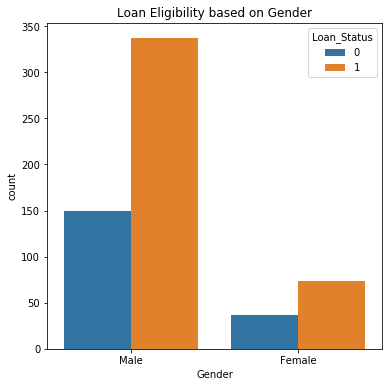

In [425]:
plt.figure(figsize=(6,6))
sns.countplot('Gender',hue='Loan_Status', data = df)
plt.title("Loan Eligibility based on Gender")
plt.show()

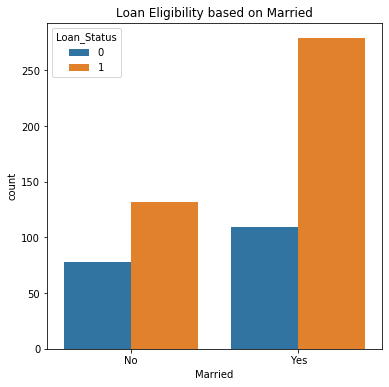

In [426]:
plt.figure(figsize=(6,6))
sns.countplot('Married',hue='Loan_Status', data = df)
plt.title("Loan Eligibility based on Married")
plt.show()

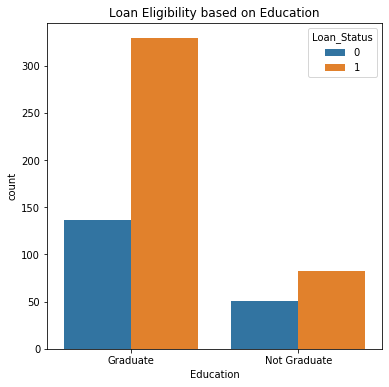

In [427]:
plt.figure(figsize=(6,6))
sns.countplot('Education',hue='Loan_Status', data = df)
plt.title("Loan Eligibility based on Education")
plt.show()

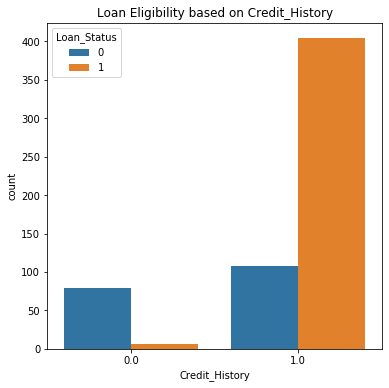

In [428]:
plt.figure(figsize=(6,6))
sns.countplot('Credit_History',hue='Loan_Status', data = df)
plt.title("Loan Eligibility based on Credit_History")
plt.show()

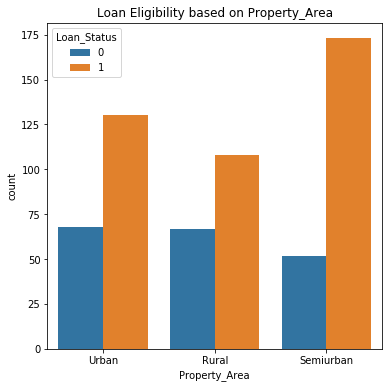

In [429]:
plt.figure(figsize=(6,6))
sns.countplot('Property_Area',hue='Loan_Status', data = df)
plt.title("Loan Eligibility based on Property_Area")
plt.show()

Observations from the above visualizations:
1. Most of the applicants who applied for loan are male and most of them are eligible for loan.
2. Married customers have more chances of getting the loan.
3. Education plays an important role in deciding whether the person is eligible for the loan or not. Graduates have higher probability of getting the loan as compared to customers who are not graduates.
4. Application with Credit History as 1 have very high chances of getting the loan as compared to application with Credit History as 0.
5. Applicants living in Semiurban area have higher chances of getting the loan as compared to other applicants.

In [430]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [431]:
# convert categorical columns to numerical values
df.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [432]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [433]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
Property_Area = pd.get_dummies(df['Property_Area'],drop_first=True)
#Adding the results to the master dataframe
df = pd.concat([df,Property_Area],axis=1)

In [434]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Semiurban,Urban
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,Urban,1,0,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1,0,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1,0,1


In [436]:
df.drop(["Loan_ID","Property_Area"],axis=1,inplace = True)

In [437]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Semiurban,Urban
0,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [442]:
X = df.drop("Loan_Status",axis = 1)
y = df["Loan_Status"]

# Feature Importance

In [445]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [446]:
selection.feature_importances_

array([0.02284859, 0.01735689, 0.06095931, 0.02478877, 0.02702305,
       0.17387248, 0.12804132, 0.17040509, 0.05190348, 0.28690826,
       0.01430367, 0.02158909])

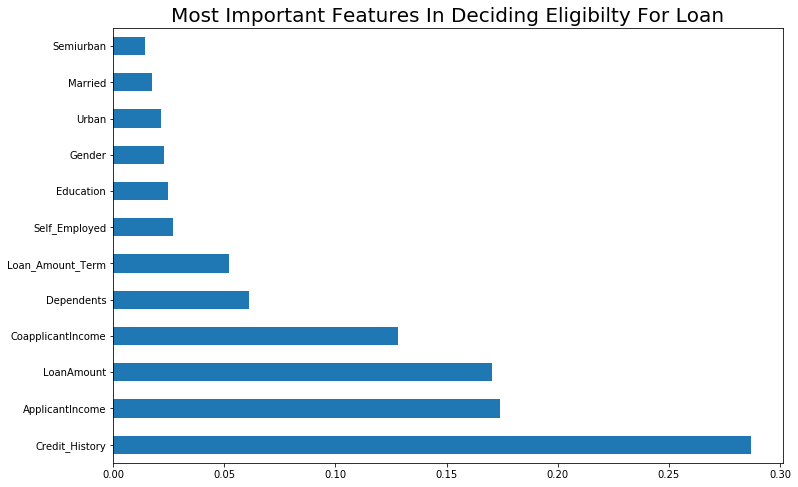

In [451]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title("Most Important Features In Deciding Eligibilty For Loan", fontsize = 20)
plt.show()

As we can see above, Credit_History, ApplicantIncome and LoanAmount are the three most importa.t features which help us in deciding whether the applicant is eligible for the loan or not,

# Model Building

In [475]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 42)
print("Shape of X_train -",X_train.shape)
print("Shape of X_test -",X_test.shape)
print("Shape of y_train -",y_train.shape[0])
print("Shape of y_test -",y_test.shape[0])

Shape of X_train - (478, 12)
Shape of X_test - (120, 12)
Shape of y_train - 478
Shape of y_test - 120


In [476]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Naive Bayes

For values of alpha =  1e-05 The accuarcy is: 0.8083333333333333
For values of alpha =  0.0001 The accuarcy is: 0.8083333333333333
For values of alpha =  0.001 The accuarcy is: 0.8083333333333333
For values of alpha =  0.1 The accuarcy is: 0.8083333333333333
For values of alpha =  1 The accuarcy is: 0.8083333333333333
For values of alpha =  10 The accuarcy is: 0.8083333333333333
For values of alpha =  100 The accuarcy is: 0.75
For values of alpha =  1000 The accuarcy is: 0.6833333333333333

****************************************************************************************************

For values of best alpha =  1e-05 The train accuracy is: 0.8075313807531381
For values of best alpha =  1e-05 The test accuracy is: 0.8083333333333333

****************************************************************************************************


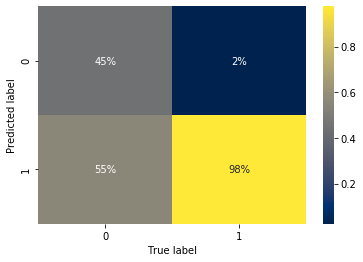

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.79      0.98      0.87        82

    accuracy                           0.81       120
   macro avg       0.84      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120



In [523]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.naive_bayes import BernoulliNB
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000] 
accuracy_score_array=[]
for i in alpha:
    clf = BernoulliNB(alpha=i)
    clf.fit(X_train, y_train)
    predict_y = clf.predict(X_test)
    accuracy_score_array.append(accuracy_score(y_test, predict_y))
    print('For values of alpha = ', i, "The accuarcy is:",accuracy_score(y_test, predict_y))

#Selectig the best value of alpha
best_alpha = np.argmax(accuracy_score_array)
clf = BernoulliNB(alpha=alpha[best_alpha])
clf.fit(X_train, y_train)

print()
print('*'*100)
print()
predict_y_train = clf.predict(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train accuracy is:",accuracy_score(y_train, predict_y_train))
predict_y_test = clf.predict(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test accuracy is:",accuracy_score(y_test, predict_y_test))

print()
print('*'*100)
#Confusion Matrix
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, predict_y_test, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

#Classificatin Report
print(classification_report(y_test, predict_y_test))

## Logistic Regression - Without Class Balancing

For values of C =  1e-05 The accuarcy is: 0.6833333333333333
For values of C =  0.0001 The accuarcy is: 0.6833333333333333
For values of C =  0.001 The accuarcy is: 0.6833333333333333
For values of C =  0.01 The accuarcy is: 0.8083333333333333
For values of C =  0.1 The accuarcy is: 0.8083333333333333
For values of C =  1 The accuarcy is: 0.8166666666666667
For values of C =  10 The accuarcy is: 0.8166666666666667

****************************************************************************************************

For values of best C =  1 The train accuracy is: 0.8075313807531381
For values of best C =  1 The test accuracy is: 0.8166666666666667

****************************************************************************************************


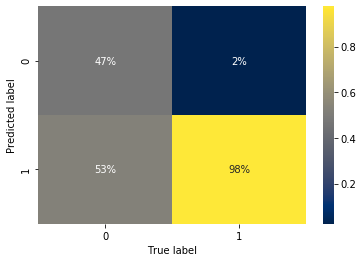

              precision    recall  f1-score   support

           0       0.90      0.47      0.62        38
           1       0.80      0.98      0.88        82

    accuracy                           0.82       120
   macro avg       0.85      0.72      0.75       120
weighted avg       0.83      0.82      0.80       120



In [547]:
from sklearn.linear_model import LogisticRegression
C = [10 ** x for x in range(-5, 2)]
accuracy_score_array=[]
for i in C:
    clf = LogisticRegression(C=i)
    clf.fit(X_train, y_train)
    predict_y = clf.predict(X_test)
    accuracy_score_array.append(accuracy_score(y_test, predict_y))
    print('For values of C = ', i, "The accuarcy is:",accuracy_score(y_test, predict_y))

#Selectig the best value of alpha
best_C = np.argmax(accuracy_score_array)
clf = LogisticRegression(C=C[best_C])
clf.fit(X_train, y_train)

print()
print('*'*100)
print()
predict_y_train = clf.predict(X_train)
print('For values of best C = ', C[best_C], "The train accuracy is:",accuracy_score(y_train, predict_y_train))
predict_y_test = clf.predict(X_test)
print('For values of best C = ', C[best_C], "The test accuracy is:",accuracy_score(y_test, predict_y_test))

print()
print('*'*100)
#Confusion Matrix
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, predict_y_test, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

#Classificatin Report
print(classification_report(y_test, predict_y_test))

## Logistic Regression - With Class Balancing

For values of C =  1e-05 The accuarcy is: 0.775
For values of C =  0.0001 The accuarcy is: 0.8083333333333333
For values of C =  0.001 The accuarcy is: 0.8083333333333333
For values of C =  0.01 The accuarcy is: 0.8083333333333333
For values of C =  0.1 The accuarcy is: 0.7916666666666666
For values of C =  1 The accuarcy is: 0.7916666666666666
For values of C =  10 The accuarcy is: 0.7833333333333333

****************************************************************************************************

For values of best C =  0.0001 The train accuracy is: 0.801255230125523
For values of best C =  0.0001 The test accuracy is: 0.8083333333333333

****************************************************************************************************


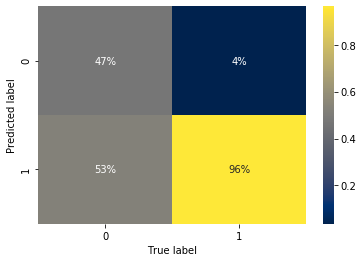

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        38
           1       0.80      0.96      0.87        82

    accuracy                           0.81       120
   macro avg       0.83      0.72      0.74       120
weighted avg       0.82      0.81      0.79       120



In [529]:
from sklearn.linear_model import LogisticRegression
C = [10 ** x for x in range(-5, 2)]
accuracy_score_array=[]
for i in C:
    clf = LogisticRegression(C=i,class_weight="balanced")
    clf.fit(X_train, y_train)
    predict_y = clf.predict(X_test)
    accuracy_score_array.append(accuracy_score(y_test, predict_y))
    print('For values of C = ', i, "The accuarcy is:",accuracy_score(y_test, predict_y))

#Selectig the best value of alpha
best_C = np.argmax(accuracy_score_array)
clf = LogisticRegression(C=C[best_C],class_weight="balanced")
clf.fit(X_train, y_train)

print()
print('*'*100)
print()
predict_y_train = clf.predict(X_train)
print('For values of best C = ', C[best_C], "The train accuracy is:",accuracy_score(y_train, predict_y_train))
predict_y_test = clf.predict(X_test)
print('For values of best C = ', C[best_C], "The test accuracy is:",accuracy_score(y_test, predict_y_test))

print()
print('*'*100)
#Confusion Matrix
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, predict_y_test, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

#Classificatin Report
print(classification_report(y_test, predict_y_test))

## Linear SVM

For values of C =  1e-05 The accuarcy is: 0.6833333333333333
For values of C =  0.0001 The accuarcy is: 0.6833333333333333
For values of C =  0.001 The accuarcy is: 0.6833333333333333
For values of C =  0.01 The accuarcy is: 0.8083333333333333
For values of C =  0.1 The accuarcy is: 0.8083333333333333
For values of C =  1 The accuarcy is: 0.8083333333333333
For values of C =  10 The accuarcy is: 0.8083333333333333

****************************************************************************************************

For values of best C =  0.01 The train accuracy is: 0.8075313807531381
For values of best C =  0.01 The test accuracy is: 0.8083333333333333

****************************************************************************************************


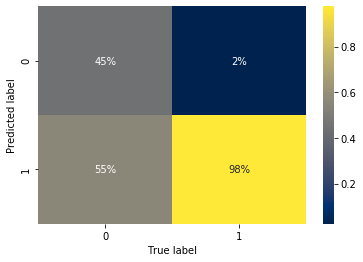

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.79      0.98      0.87        82

    accuracy                           0.81       120
   macro avg       0.84      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120



In [535]:
from sklearn.svm import SVC
C = [10 ** x for x in range(-5, 2)]
accuracy_score_array=[]
for i in C:
    clf = SVC(C=i,kernel='linear')
    clf.fit(X_train, y_train)
    predict_y = clf.predict(X_test)
    accuracy_score_array.append(accuracy_score(y_test, predict_y))
    print('For values of C = ', i, "The accuarcy is:",accuracy_score(y_test, predict_y))

#Selectig the best value of alpha
best_C = np.argmax(accuracy_score_array)
clf = SVC(C=C[best_C],kernel='linear')
clf.fit(X_train, y_train)

print()
print('*'*100)
print()
predict_y_train = clf.predict(X_train)
print('For values of best C = ', C[best_C], "The train accuracy is:",accuracy_score(y_train, predict_y_train))
predict_y_test = clf.predict(X_test)
print('For values of best C = ', C[best_C], "The test accuracy is:",accuracy_score(y_test, predict_y_test))

print()
print('*'*100)
#Confusion Matrix
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, predict_y_test, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

#Classificatin Report
print(classification_report(y_test, predict_y_test))

## SVM With Rbf Kernel

For values of C =  1e-05 The accuarcy is: 0.6833333333333333
For values of C =  0.0001 The accuarcy is: 0.6833333333333333
For values of C =  0.001 The accuarcy is: 0.6833333333333333
For values of C =  0.01 The accuarcy is: 0.6833333333333333
For values of C =  0.1 The accuarcy is: 0.7583333333333333
For values of C =  1 The accuarcy is: 0.8083333333333333
For values of C =  10 The accuarcy is: 0.8083333333333333

****************************************************************************************************

For values of best C =  1 The train accuracy is: 0.8242677824267782
For values of best C =  1 The test accuracy is: 0.8083333333333333

****************************************************************************************************


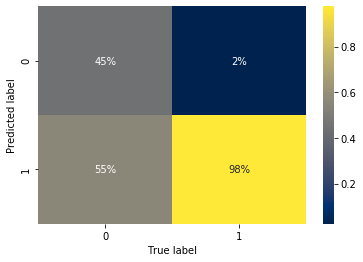

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.79      0.98      0.87        82

    accuracy                           0.81       120
   macro avg       0.84      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120



In [544]:
from sklearn.svm import SVC
C = [10 ** x for x in range(-5, 2)]
accuracy_score_array=[]
for i in C:
    clf = SVC(C=i,kernel='rbf')
    clf.fit(X_train, y_train)
    predict_y = clf.predict(X_test)
    accuracy_score_array.append(accuracy_score(y_test, predict_y))
    print('For values of C = ', i, "The accuarcy is:",accuracy_score(y_test, predict_y))

#Selectig the best value of alpha
best_C = np.argmax(accuracy_score_array)
clf = SVC(C=C[best_C],kernel='rbf')
clf.fit(X_train, y_train)

print()
print('*'*100)
print()
predict_y_train = clf.predict(X_train)
print('For values of best C = ', C[best_C], "The train accuracy is:",accuracy_score(y_train, predict_y_train))
predict_y_test = clf.predict(X_test)
print('For values of best C = ', C[best_C], "The test accuracy is:",accuracy_score(y_test, predict_y_test))

print()
print('*'*100)
#Confusion Matrix
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, predict_y_test, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

#Classificatin Report
print(classification_report(y_test, predict_y_test))

## Random Forest 

for n_estimators = 100 and max depth =  5
The accuarcy is: 0.8083333333333333
for n_estimators = 100 and max depth =  10
The accuarcy is: 0.8083333333333333
for n_estimators = 200 and max depth =  5
The accuarcy is: 0.8083333333333333
for n_estimators = 200 and max depth =  10
The accuarcy is: 0.8083333333333333
for n_estimators = 500 and max depth =  5
The accuarcy is: 0.8083333333333333
for n_estimators = 500 and max depth =  10
The accuarcy is: 0.8083333333333333
for n_estimators = 1000 and max depth =  5
The accuarcy is: 0.8083333333333333
for n_estimators = 1000 and max depth =  10
The accuarcy is: 0.8083333333333333
for n_estimators = 2000 and max depth =  5
The accuarcy is: 0.8083333333333333
for n_estimators = 2000 and max depth =  10
The accuarcy is: 0.8083333333333333

****************************************************************************************************

For values of best alpha =  100 The train accuracy is: 0.8179916317991632
For values of best alpha =  100 Th

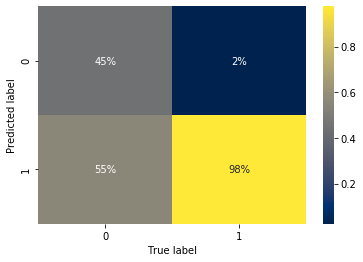

              precision    recall  f1-score   support

           0       0.89      0.45      0.60        38
           1       0.79      0.98      0.87        82

    accuracy                           0.81       120
   macro avg       0.84      0.71      0.74       120
weighted avg       0.82      0.81      0.79       120



In [546]:
from sklearn.ensemble import RandomForestClassifier

alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
accuracy_score_array=[]
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train,y_train)
        predict_y = clf.predict(X_test)
        accuracy_score_array.append(accuracy_score(y_test, predict_y))
        print("The accuarcy is:",accuracy_score(y_test, predict_y))

#Selectig the best value of alpha
best_alpha = np.argmax(accuracy_score_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(X_train, y_train)


print()
print('*'*100)
print()
predict_y_train = clf.predict(X_train)
print('For values of best alpha = ', alpha[int(best_alpha/2)], "The train accuracy is:",accuracy_score(y_train, predict_y_train))
predict_y_test = clf.predict(X_test)
print('For values of best alpha = ', alpha[int(best_alpha/2)], "The test accuracy is:",accuracy_score(y_test, predict_y_test))

print()
print('*'*100)
#Confusion Matrix
# Create the confusion matrix
conf_mat = confusion_matrix(y_test, predict_y_test, normalize="true")
# Plot the confusion matrix
sns.heatmap(conf_mat.T, annot=True, fmt=".0%", cmap="cividis")
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

#Classificatin Report
print(classification_report(y_test, predict_y_test))

In [549]:
#Result
print()
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = "*** Model Summary *** [Performance Metric: Accuracy Score]"
ptable.field_names=["Model Name","Train Accuracy","Test Accuracy"]
ptable.add_row(["Naive Bayes","0.807","0.808"])
ptable.add_row(["Logistic Regression - Without Class Balancing","0.807","0.817"])
ptable.add_row(["Logistic Regression - With Class Balancing","0.801","0.808"])
ptable.add_row(["Linear SVM","0.807","0.808"])
ptable.add_row(["SVC With Rbf Kernel","0.824","0.808"])
ptable.add_row(["Random Forest","0.817","0.808"])

print(ptable)
print()


+--------------------------------------------------------------------------------+
|           *** Model Summary *** [Performance Metric: Accuracy Score]           |
+-----------------------------------------------+----------------+---------------+
|                   Model Name                  | Train Accuracy | Test Accuracy |
+-----------------------------------------------+----------------+---------------+
|                  Naive Bayes                  |     0.807      |     0.808     |
| Logistic Regression - Without Class Balancing |     0.807      |     0.817     |
|   Logistic Regression - With Class Balancing  |     0.801      |     0.808     |
|                   Linear SVM                  |     0.807      |     0.808     |
|              SVC With Rbf Kernel              |     0.824      |     0.808     |
|                 Random Forest                 |     0.817      |     0.808     |
+-----------------------------------------------+----------------+---------------+



Thus, we can see that Logistic Regression - Without Class Balancing is the best model with an accuracy of 81.7 %